In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

dist1 = cv2.imread("../images/IQA/dist_SCI25_1_2.bmp",cv2.IMREAD_UNCHANGED)
dist2 = cv2.imread("../images/IQA/dist_SCI25_1_3.bmp",cv2.IMREAD_UNCHANGED)
ref = cv2.imread("../images/IQA/ref_SCI25.bmp",cv2.IMREAD_UNCHANGED)

dist1 = cv2.cvtColor(dist1, cv2.COLOR_BGR2RGB)
dist2 = cv2.cvtColor(dist2, cv2.COLOR_BGR2RGB)
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)

dist1.shape   # (834, 1114, 3)

dist2.shape    # (512, 512, 3)

ref.shape      #  (280, 450, 3)

(720, 1280, 3)

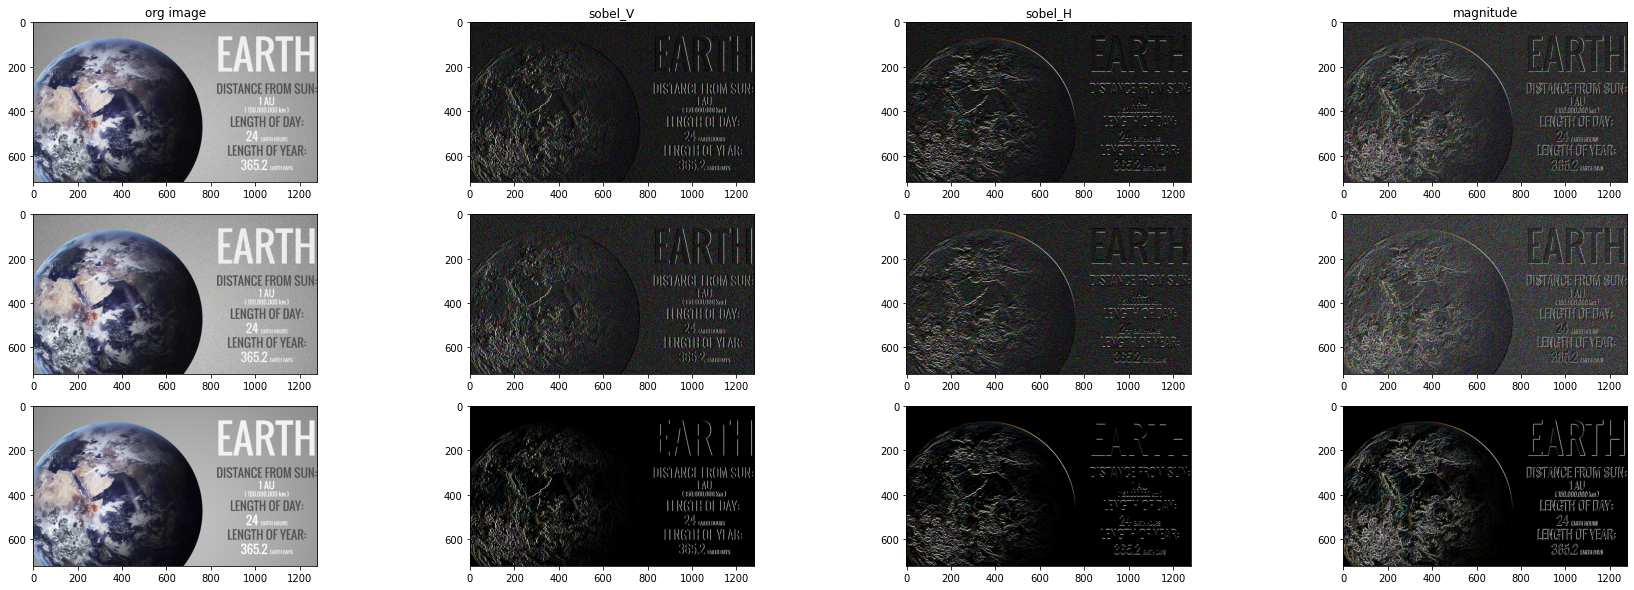

In [2]:

sobel_V =  np.array([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])

sobel_H =  np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2,-1]])

dist1_flt_imgV = cv2.filter2D(src=dist1, ddepth=-1, kernel=sobel_V)
dist1_flt_imgH = cv2.filter2D(src=dist1, ddepth=-1, kernel=sobel_H)
dist1_mag = np.sqrt(dist1_flt_imgV.astype(int) ** 2 + dist1_flt_imgH.astype(int) ** 2).astype(np.uint8)

dist2_flt_imgV = cv2.filter2D(src=dist2, ddepth=-1, kernel=sobel_V)
dist2_flt_imgH = cv2.filter2D(src=dist2, ddepth=-1, kernel=sobel_H)
dist2_mag = np.sqrt(dist2_flt_imgV.astype(int) ** 2 + dist2_flt_imgH.astype(int) ** 2).astype(np.uint8)

ref_flt_imgV = cv2.filter2D(src=ref, ddepth=-1, kernel=sobel_V)
ref_flt_imgH = cv2.filter2D(src=ref, ddepth=-1, kernel=sobel_H)
ref_mag = np.sqrt(ref_flt_imgV.astype(int) ** 2 + ref_flt_imgH.astype(int) ** 2).astype(np.uint8)
  

# cv2.imshow(building)
fig, subplt = plt.subplots(3,4,figsize=(30,10))
subplt[0][0].imshow(dist1)
subplt[0][0].set_title("org image")
subplt[0][1].imshow(dist1_flt_imgV)
subplt[0][1].set_title("sobel_V")
subplt[0][2].imshow(dist1_flt_imgH)
subplt[0][2].set_title("sobel_H")
subplt[0][3].imshow(dist1_mag)
subplt[0][3].set_title("magnitude")


subplt[1][0].imshow(dist2)
subplt[1][1].imshow(dist2_flt_imgV)
subplt[1][2].imshow(dist2_flt_imgH)
subplt[1][3].imshow(dist2_mag)

subplt[2][0].imshow(ref)
subplt[2][1].imshow(ref_flt_imgV)
subplt[2][2].imshow(ref_flt_imgH)
subplt[2][3].imshow(ref_mag)

fig.savefig('Q4_step1.png')

In [16]:
def sim(img1 , img2):
   numerator = 2 * np.multiply(img1.astype(int), img2.astype(int)) + 0.0000001
   denominator = (img1.astype(int) ** 2 + img2.astype(int) ** 2) + 0.0000001
   sim = numerator / denominator
   return np.var(sim)

sim(dist2_mag,dist2_mag)


0.0

In [17]:
from tabulate import tabulate
from skimage.metrics import peak_signal_noise_ratio , structural_similarity as ssim


sim(dist2_mag,ref_mag)
# dist1_mag
# dist2_mag
# ref_mag


mydata = [

    ["dist_SCI25_1_2", str(sim(ref_mag,dist1_mag)) , str(ssim(ref_mag,dist1_mag ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_mag,dist1_mag))],
    ["dist_SCI25_1_3", str(sim(ref_mag,dist2_mag)) , str(ssim(ref_mag,dist2_mag ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_mag,dist2_mag))],
   
]
 
# create header
head = ["images", "sim" , "ssim" , "psnr"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

C:\Users\Farhad\AppData\Local\Temp\ipykernel_11096\3419784586.py:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ["dist_SCI25_1_2", str(sim(ref_mag,dist1_mag)) , str(ssim(ref_mag,dist1_mag ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_mag,dist1_mag))],
C:\Users\Farhad\AppData\Local\Temp\ipykernel_11096\3419784586.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ["dist_SCI25_1_3", str(sim(ref_mag,dist2_mag)) , str(ssim(ref_mag,dist2_mag ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_mag,dist2_mag))],


+----------------+----------+----------+---------+
| images         |      sim |     ssim |    psnr |
+================+==========+==========+=========+
| dist_SCI25_1_2 | 0.18527  | 0.192065 | 12.7539 |
+----------------+----------+----------+---------+
| dist_SCI25_1_3 | 0.176221 | 0.134495 | 10.1519 |
+----------------+----------+----------+---------+


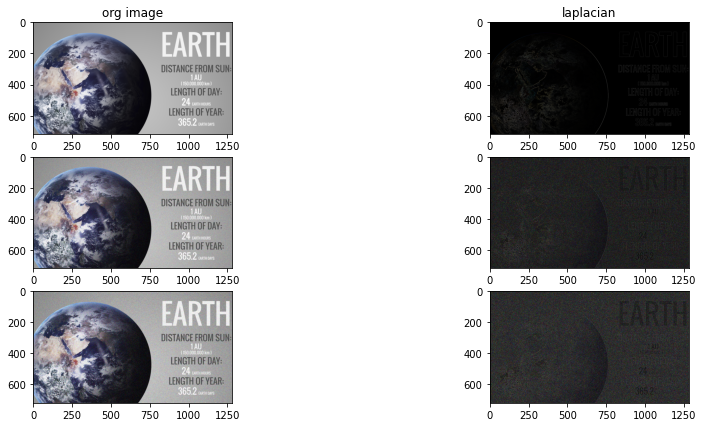

In [18]:
laplacian =  np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])



dist1_flt = cv2.filter2D(src=dist1, ddepth=-1, kernel=laplacian)


dist2_flt = cv2.filter2D(src=dist2, ddepth=-1, kernel=laplacian)


ref_flt = cv2.filter2D(src=ref, ddepth=-1, kernel=laplacian)

  

# cv2.imshow(building)
fig, subplt = plt.subplots(3,2,figsize=(15,7))
subplt[0][0].imshow(ref)
subplt[0][0].set_title("org image")
subplt[0][1].imshow(ref_flt)
subplt[0][1].set_title("laplacian")



subplt[1][0].imshow(dist1)
subplt[1][1].imshow(dist1_flt)


subplt[2][0].imshow(dist2)
subplt[2][1].imshow(dist2_flt)


fig.savefig('Q4_step2.png')

In [19]:



mydata = [

    ["dist_SCI25_1_2", str(sim(ref_flt,dist1_flt)) , str(ssim(ref_flt,dist1_flt ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_flt,dist1_flt))],
    ["dist_SCI25_1_3", str(sim(ref_flt,dist2_flt)) , str(ssim(ref_flt,dist2_flt ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_flt,dist2_flt))],
   
]
 
# create header
head = ["images", "sim" , "ssim" , "psnr"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

C:\Users\Farhad\AppData\Local\Temp\ipykernel_11096\3007106214.py:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ["dist_SCI25_1_2", str(sim(ref_flt,dist1_flt)) , str(ssim(ref_flt,dist1_flt ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_flt,dist1_flt))],
C:\Users\Farhad\AppData\Local\Temp\ipykernel_11096\3007106214.py:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ["dist_SCI25_1_3", str(sim(ref_flt,dist2_flt)) , str(ssim(ref_flt,dist2_flt ,  multichannel=True))  , str(peak_signal_noise_ratio(ref_flt,dist2_flt))],


+----------------+----------+-----------+---------+
| images         |      sim |      ssim |    psnr |
+================+==========+===========+=========+
| dist_SCI25_1_2 | 0.222079 | 0.0552271 | 13.4821 |
+----------------+----------+-----------+---------+
| dist_SCI25_1_3 | 0.221025 | 0.029281  | 10.7439 |
+----------------+----------+-----------+---------+
